In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.1.0
blinker                          1.4
bl

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/untitled folder'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
data_dir = '/content/untitled folder'
image_exts = ['jpeg', 'jpg', 'png', 'bmp']  # List of allowed image extensions

for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_dir):
        continue  # Skip if it's not a directory
    for image in os.listdir(class_dir):
        if image.startswith('.'):  # Skip hidden files and directories
            continue
        image_path = os.path.join(class_dir, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


Image not in ext list /content/untitled folder/puppy/768x432.jpg
Image not in ext list /content/untitled folder/puppy/IMG_5917.jpg
Image not in ext list /content/untitled folder/puppy/4a4c800d5af56e0cd00edc9a86e06ae345-11-puppies.rsocial.w1200.jpg
Image not in ext list /content/untitled folder/butterfly/Morpho-butterfly-leaf-Costa-Rica.jpg
Image not in ext list /content/untitled folder/butterfly/800px-Fesoj_-_Papilio_machaon_28by29.jpg
Image not in ext list /content/untitled folder/butterfly/n9iZc2j0tZ-KFuOCefnlLtmHJ6AcvSaihN8XJj2cQyo.jpeg
Image not in ext list /content/untitled folder/butterfly/butterfly-header.jpg
Image not in ext list /content/untitled folder/butterfly/Monarch-butterfly.jpg
Image not in ext list /content/untitled folder/butterfly/monarch-butterfly-flowers-bush.jpg
Image not in ext list /content/untitled folder/butterfly/6-butterfly-drawing.jpg.webp
Image not in ext list /content/untitled folder/butterfly/ppus-resting-on-a-flowering-plant-in-a-butterfly-pavilion-linc

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/untitled folder')

Found 363 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

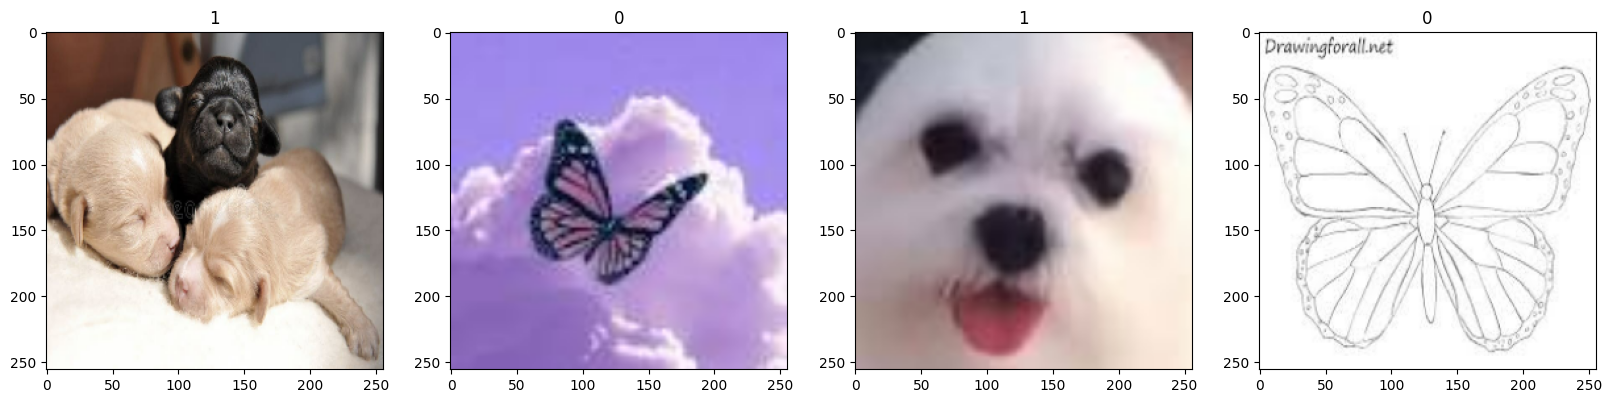

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# 1 puppy, 0 butterfly

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         ...,
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

8

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 21s 814ms/step - loss: 1.2280 - accuracy: 0.5078 - val_loss: 0.5961 - val_accuracy: 0.5625
Epoch 2/20
8/8 [==============================] - 5s 444ms/step - loss: 0.6212 - accuracy: 0.4766 - val_loss: 0.5041 - val_accuracy: 0.5625
Epoch 3/20
8/8 [==============================] - 5s 484ms/step - loss: 0.4205 - accuracy: 0.7695 - val_loss: 0.3160 - val_accuracy: 0.9062
Epoch 4/20
8/8 [==============================] - 4s 376ms/step - loss: 0.3439 - accuracy: 0.8633 - val_loss: 0.2405 - val_accuracy: 0.9531
Epoch 5/20
8/8 [==============================] - 5s 445ms/step - loss: 0.2479 - accuracy: 0.9062 - val_loss: 0.2970 - val_accuracy: 0.8906
Epoch 6/20
8/8 [==============================] - 5s 370ms/step - loss: 0.1852 - accuracy: 0.9375 - val_loss: 0.0675 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 4s 379ms/step - loss: 0.1274 - accuracy: 0.9492 - val_loss: 0.1408 - val_accuracy: 0.9844
Epoch 8/20
8/8 [===

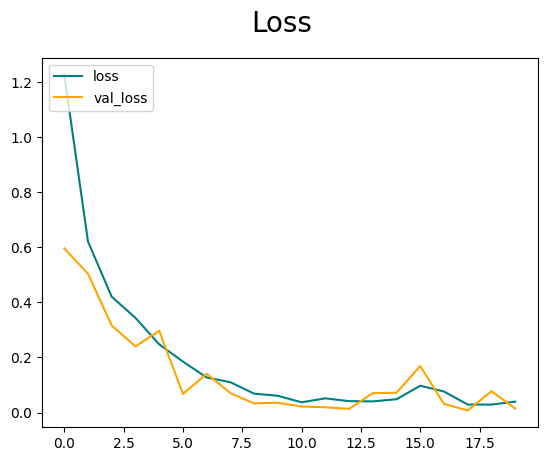

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

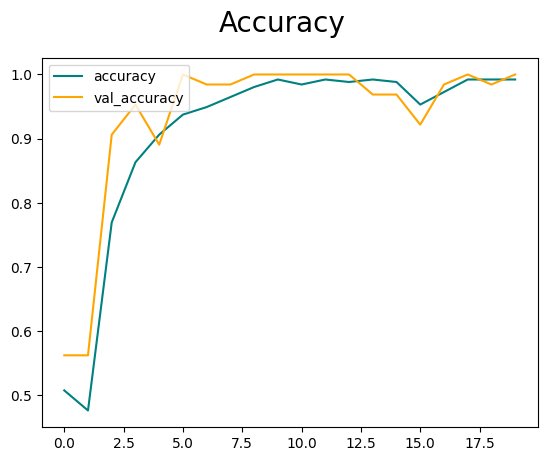

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 121ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.95, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


In [ ]:
import cv2

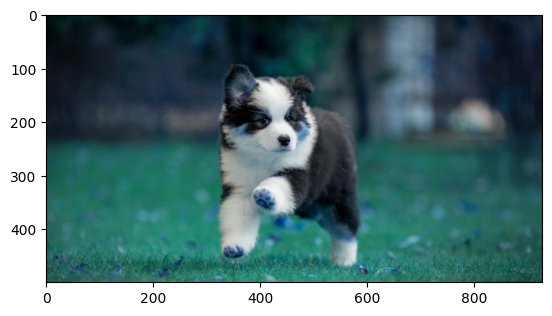

In [ ]:
img = cv2.imread('/content/cek.jpeg')
plt.imshow(img)
plt.show()

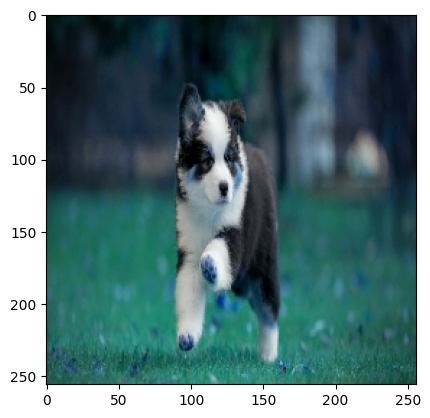

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 444ms/step


In [ ]:
yhat

array([[0.9928134]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Puppy')
else:
    print(f'Predicted class is Butterfly')

Predicted class is Puppy


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','puppybutterfly.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('/content/models/puppybutterfly.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 123ms/step


array([[0.9928134]], dtype=float32)